# Obrada podataka po kanalu prodaje

U ovoj bilježnici nalaze se postupci obrade podataka uzimajući u obzir kanal prodaje. Pokušavamo vidjeti koje su navike gostiju ovisno o pojednim kanalima prodaje.

Prvo počinjemo uvozom potrebnih biblioteka.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Zatim pronalazimo lokaciju i učitavamo .csv datoteku s podatcima

In [27]:
curr = Path.cwd()
path = curr.parent.parent
filePath = str(path)
filePath += "/cleaned_data.csv"
#print(filePath)
dataFrame = pd.read_csv(filePath)
#dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     93962 non-null  int64  
 1   hotel_id                       93962 non-null  int64  
 2   datum_dolaska                  93962 non-null  object 
 3   datum_kreiranja_rezervacije    93962 non-null  object 
 4   datum_odjave                   93962 non-null  object 
 5   datum_otkazivanja_rezervacije  19548 non-null  object 
 6   broj_odraslih_gostiju          93962 non-null  int64  
 7   broj_djece_gostiju             93962 non-null  float64
 8   zemlja_gosta                   93962 non-null  object 
 9   kanal_prodaje_id               93962 non-null  int64  
 10  tip_sobe_id                    93962 non-null  int64  
 11  cijena_nocenja                 93962 non-null  float64
 12  status_rezervacije             93962 non-null 

## Različiti kanali prodaje

Prvo pronalazimo koliko je različitih kanala prodaje te učestalost korištenja pojedinog kanala. 

<BarContainer object of 5 artists>

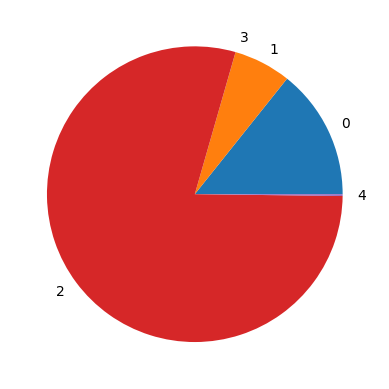

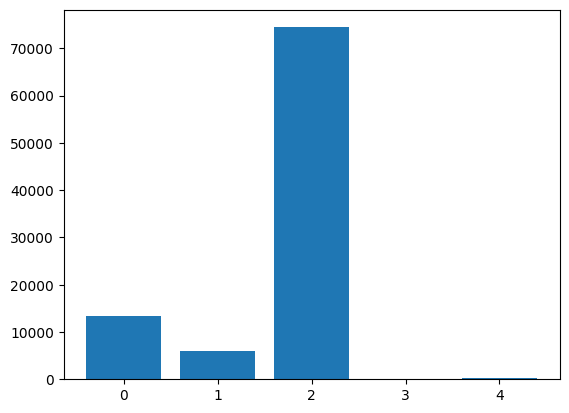

In [68]:
uniqueSalesChannels = set(dataFrame["kanal_prodaje_id"].unique())
#salesChannelsFile = open("salesChannels.txt", "w")
#for channel in dataFrame["kanal_prodaje_id"]:
#    salesChannelsFile.write(str(channel) + " ")
#print (uniqueSalesChannels)
totalSales = len(dataFrame)
salesChannels = {key : 0 for key in uniqueSalesChannels}
for key in dataFrame["kanal_prodaje_id"]:
    salesChannels[key] += 1
#print (salesChannels)
#print (sum(salesChannels.values()))
values = list(salesChannels.values())
values[2], values[3] = values[3], values[2]
labels = list(uniqueSalesChannels)
labels[2], labels[3] = labels[3], labels[2]
fig, ax = plt.subplots()
ax.pie(values, labels = labels)
fig, ax = plt.subplots()
ax.bar(labels, values)

Zatim podatke razdvajamo po kanalima prodaje.

Unnamed: 0
hotel_id
datum_dolaska
datum_kreiranja_rezervacije
datum_odjave
datum_otkazivanja_rezervacije
broj_odraslih_gostiju
broj_djece_gostiju
zemlja_gosta
kanal_prodaje_id
tip_sobe_id
cijena_nocenja
status_rezervacije
rezervacija_id
gost_id
broj_nocenja
ukupno_placeno
